In [1]:
%load_ext autoreload
%autoreload 2

import torch.nn as nn
import torch

from src.dataset.golos_big_dataset import SpeechDataset
from src.utils.parse_config import ConfigParser
from src.utils.util import write_wav, get_file_paths
from preprocessing.utils import rename_opus_files_to_wav, read_opus_files, convert_opus_to_wav
from preprocessing.noise import add_noise, save_samples_for_debug

import warnings
warnings.filterwarnings("ignore")


from matplotlib import pyplot as plt
from IPython import display

import torch
import numpy as np

import torchaudio

Считываем все загруженные .opus файлы из папки train датасета golos, конвертируем  в .wav и сохраняем с идентичной файловой структурой в новой директории:

In [2]:
file_paths = get_file_paths('/Users/diat.lov/Data/audio_data/golos_opus/train_opus')

In [3]:
opus_file_paths, wav_file_paths = rename_opus_files_to_wav(file_paths, "train_opus", 
                                                          "/Users/diat.lov/GitHub/russian_speech_denoiser/data")
audio_samples = read_opus_files(opus_file_paths[:10])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.48it/s]


In [4]:
convert_opus_to_wav(audio_samples, wav_file_paths[:10])

10it [00:00, 296.11it/s]


Зашумляем 10 дорожек и перемещаем в папку debug_russian чистые и зашумленные записи для запуска денейзера:

In [7]:
noise = "/Users/diat.lov/Data/audio_data/noise/DEMAND/DKITCHEN/ch01.wav"
wav_audio_files, clean_audio_list, noised_samples = add_noise(wav_file_paths[:10], [noise], 4)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1076.54it/s]


In [8]:
save_samples_for_debug(wav_file_paths[:10], clean_audio_list, noised_samples)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 321.56it/s]


In [26]:
config_parser = ConfigParser.get_default_configs()
dataset = SpeechDataset(config_parser)

Dataset size: 1093573.


In [16]:
write_wav(path, audio)

In [12]:
config_parser = ConfigParser.get_default_configs()
dataset = SpeechDataset(config_parser)

Dataset size: 100.


In [15]:
dataset[0]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.19it/s]


{'wav': tensor([ 1.7669e-06,  1.1273e-05,  1.1362e-05,  ..., -2.3210e-04,
         -1.6628e-04, -1.8148e-04]),
 'spectrogram': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.4845e-04, 3.2974e-02, 3.8162e-02,  ..., 1.9296e-04, 7.0197e-05,
          9.7650e-05],
         [1.3377e-03, 1.7754e-01, 2.0548e-01,  ..., 1.0390e-03, 3.7796e-04,
          5.2577e-04],
         ...,
         [6.6473e-07, 7.0490e-08, 1.8416e-07,  ..., 1.4955e-07, 2.0663e-07,
          4.2122e-07],
         [9.1048e-08, 1.3664e-08, 9.9668e-09,  ..., 5.2092e-09, 2.3554e-08,
          2.3425e-08],
         [3.1187e-08, 4.2697e-10, 1.1522e-09,  ..., 1.0053e-09, 1.8775e-09,
          2.8519e-09]]),
 'text': 'фильмы сороковых годов',
 'text_encoded': tensor([310.,  93.,  45.,  49., 149.,  26.,  65.,  85.,   7.]),
 'path': '/Users/diat.lov/Data/audio_data/golos_opus/train_opus/crowd/5/af6f2676505c73815b16e1d5a1f72332.opus',
 'duration': 3,
 'id': 'af6f2676505c

In [19]:
selfi

{'wav': tensor([ 1.6683e-05,  3.1383e-05, -2.1069e-05,  ..., -1.8096e-02,
         -1.9645e-02, -1.8365e-02]),
 'spectrogram': tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [3.3764e-05, 6.7054e-04, 9.5898e-04,  ..., 1.0289e-03, 5.5497e-04,
          1.3438e-03],
         [1.8179e-04, 3.6104e-03, 5.1634e-03,  ..., 5.5401e-03, 2.9881e-03,
          7.2351e-03],
         ...,
         [1.6616e-07, 1.5758e-07, 2.5253e-07,  ..., 3.5484e-05, 7.2634e-05,
          4.3326e-04],
         [3.1873e-08, 2.8587e-08, 3.4806e-08,  ..., 5.2884e-06, 1.6442e-05,
          6.0256e-04],
         [2.9580e-09, 1.8422e-09, 4.6398e-09,  ..., 3.5111e-08, 2.9247e-09,
          6.4521e-04]]),
 'text': 'можешь помочь прямой эфир апл лестер с брайтоном',
 'text_encoded': tensor([173., 908., 351., 334., 829., 435.,  22., 837.]),
 'path': '/Users/diat.lov/Data/audio_data/golos_opus/train_opus/crowd/0/15f566b94f248792d145e5498fac20a2.opus',
 'duration': 3,


In [10]:
def visualize_audio(wav: torch.Tensor, sr: int = 16_000):
    # Average all channels
    if wav.dim() == 2:
        # Any to mono audio convertion
        wav = wav.mean(dim=0)
    
    plt.figure(figsize=(20, 5))
    plt.plot(wav, alpha=.7, c='green')
    plt.grid()
    plt.xlabel('Time', size=20)
    plt.ylabel('Amplitude', size=20)
    plt.show()
    
    display.display(display.Audio(wav, rate=sr))

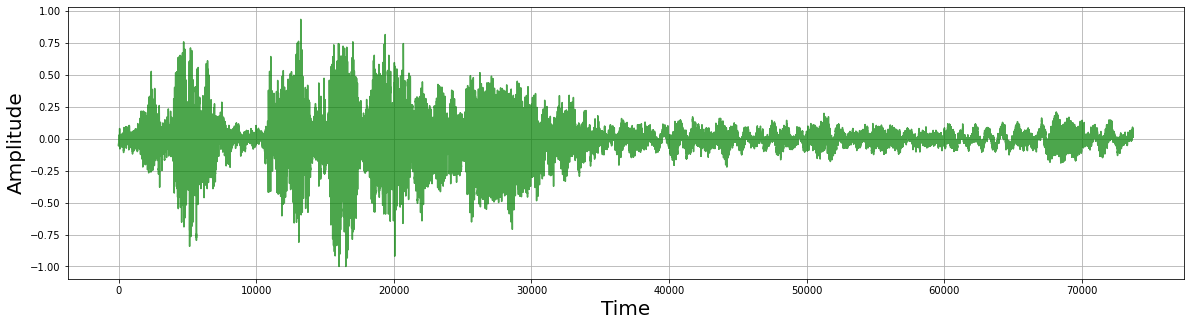

In [13]:
visualize_audio(torchaudio.load("/Users/diat.lov/GitHub/russian_speech_denoiser/denoiser/dataset/russian_debug/noisy/33b75236c95a33c80efac70a3d8d429d.wav")[0][0])

In [23]:
n_fft = 1024
window_size = n_fft
hop_size = 256
window = torch.hann_window(n_fft)

In [25]:
spectrum = torch.stft(
    selfi["wav"],
    n_fft=n_fft,
    hop_length=hop_size,
    win_length=window_size,
    window=window,
    
    # We don't want to pad input signal
    center=False,
    
    # Take first (n_fft // 2 + 1) frequencies
    onesided=True,
    
    # Apply torch.view_as_real on each window
    return_complex=False, 
)

In [26]:
spectrogram = spectrum.norm(dim=-1).pow(2)

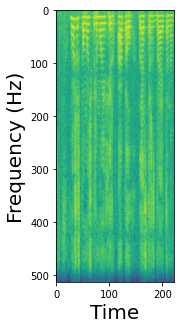

In [27]:
plt.figure(figsize=(20, 5))
plt.imshow(spectrogram.squeeze().log())
plt.xlabel('Time', size=20)
plt.ylabel('Frequency (Hz)', size=20)
plt.show()

In [31]:
write_wav("/Users/diat.lov/GitHub/russian_speech_denoiser/data/audio_samples/zero_sample.wav", selfi["wav"])

In [39]:
kitchen_noise, sr = torchaudio.load("/Users/diat.lov/Data/audio_data/noise/DEMAND/DKITCHEN/ch01.wav")

In [44]:
kitchen_noise = kitchen_noise[0][:len(selfi["wav"])]

In [46]:
assert len(kitchen_noise) == len(selfi["wav"])

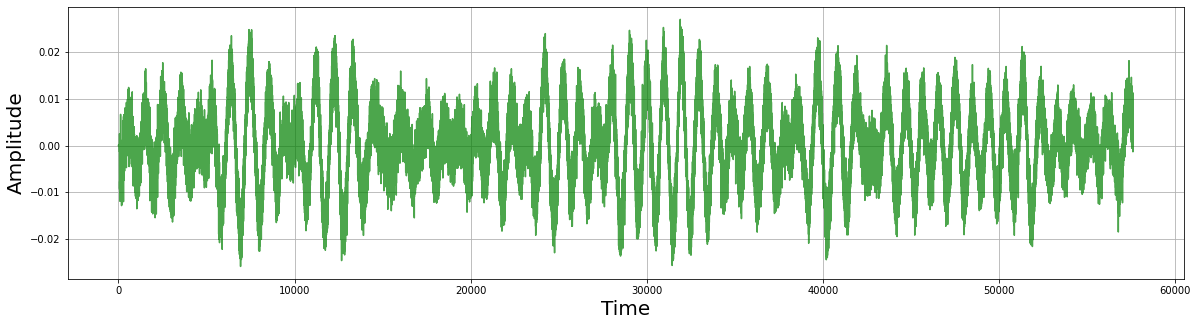

In [47]:
visualize_audio(kitchen_noise)

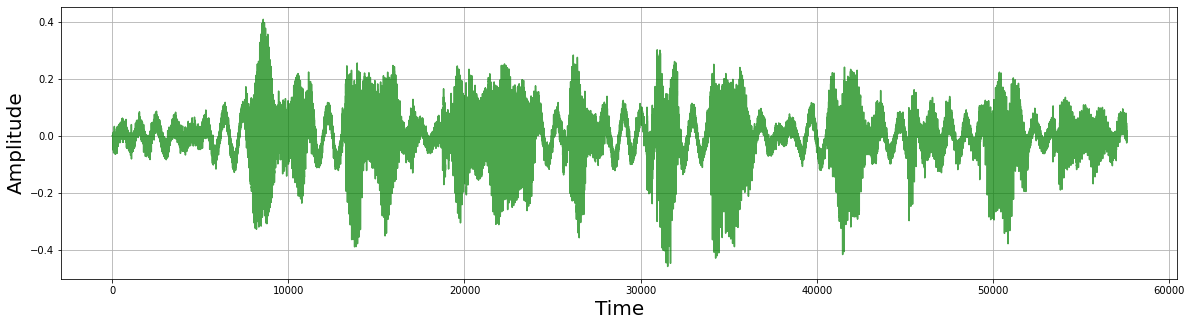

In [51]:
visualize_audio(selfi["wav"] + kitchen_noise * 5)

In [18]:
class Student:
    def __init__(self, first_name, last_name, id_, kwargs):
        self.first_name = first_name
        self.last_name = last_name
        self.id = id_
        for key, value in kwargs.items():
            setattr(self, key, value)

student1 = Student("Edward", "Gates", "01", {'math': 100, 'bio': 90, 'history': 80})

In [21]:
student1.history

80